In [10]:
# === Célula 1: Normalização do dataset augmentado ===
import os
import cv2
from pathlib import Path
from skimage import exposure

# Defina os caminhos
pasta_aug   = Path("../dataset_aug")
pasta_norm  = Path("../dataset_normalizado")
pasta_norm.mkdir(exist_ok=True)

# Para cada classe, aplica equalização e salva
for classe in sorted(pasta_aug.iterdir()):
    if not classe.is_dir():
        continue
    out_classe = pasta_norm / classe.name
    out_classe.mkdir(exist_ok=True)
    
    for img_path in sorted(classe.iterdir()):
        if img_path.suffix.lower() not in (".png", ".jpg", ".jpeg"):
            continue
        img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
        # equalização global
        img_eq = cv2.equalizeHist(img)
        # opcional: CLAHE
        # clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        # img_eq = clahe.apply(img)
        
        cv2.imwrite(str(out_classe / img_path.name), img_eq)

print(f"Dataset normalizado salvo em: {pasta_norm.resolve()}")

Dataset normalizado salvo em: C:\Users\gusta\Desktop\facul - PDI\choco classifier\Choco-Classifier\dataset_normalizado


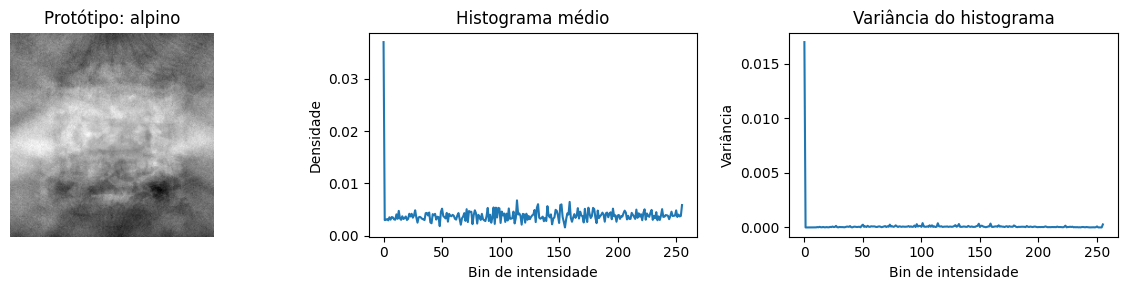

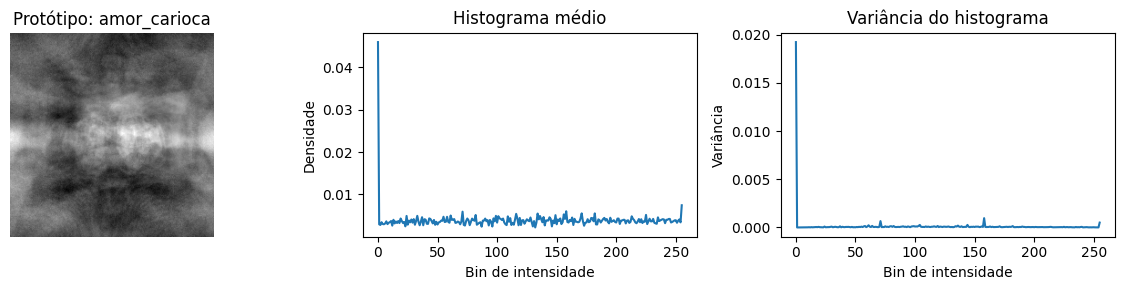

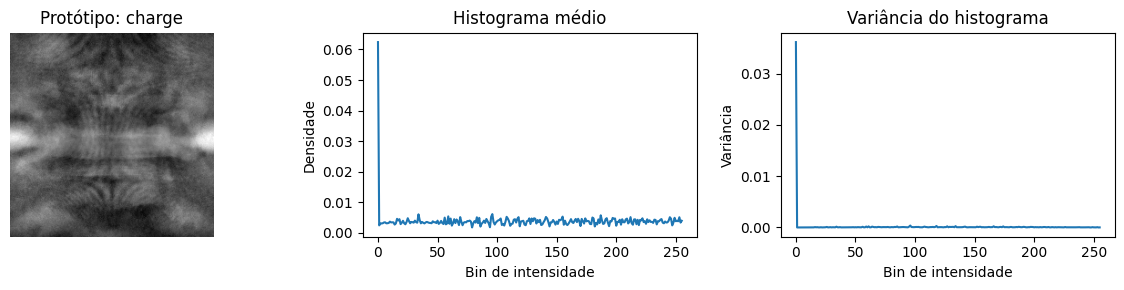

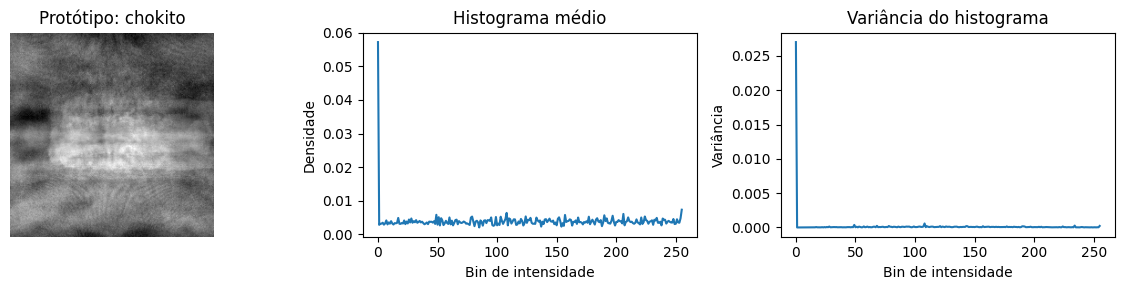

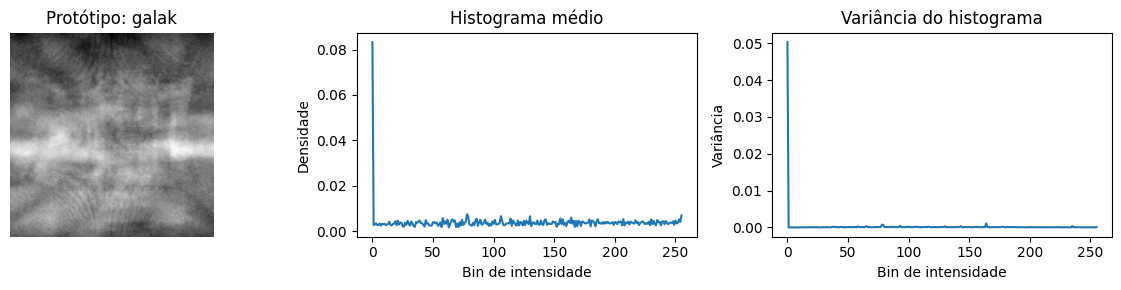

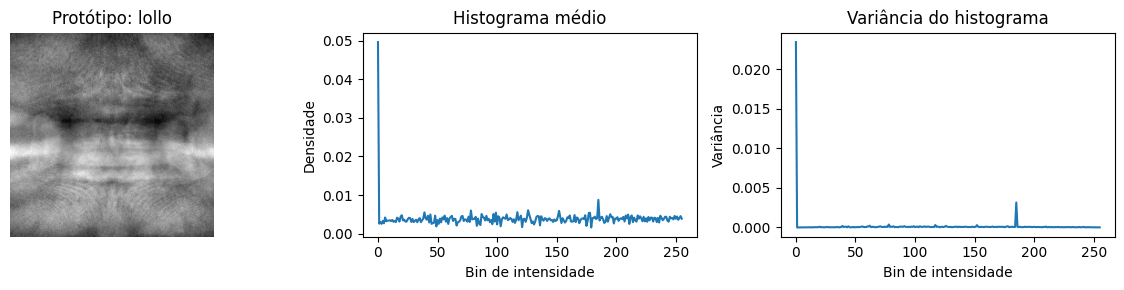

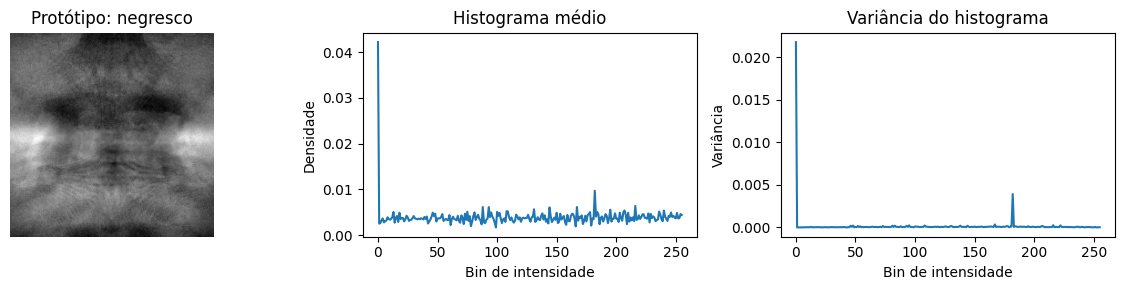

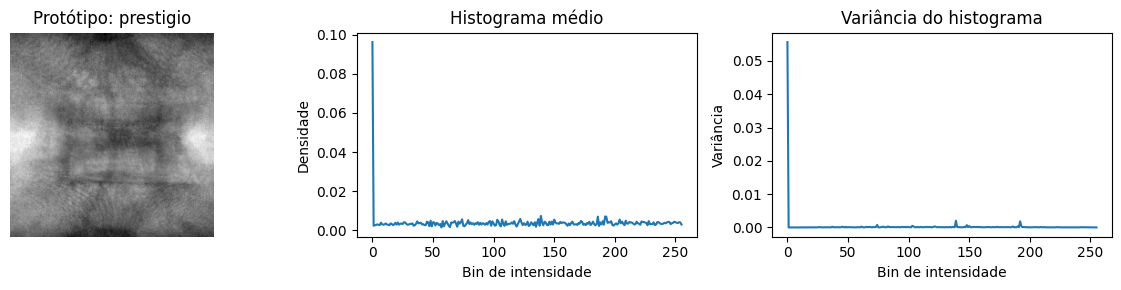

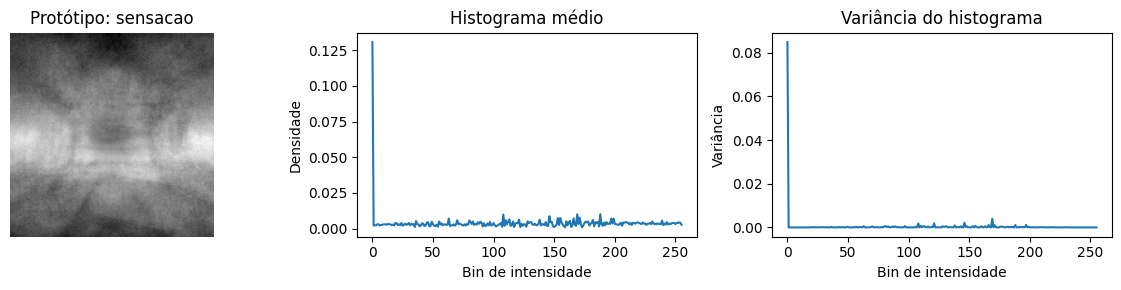

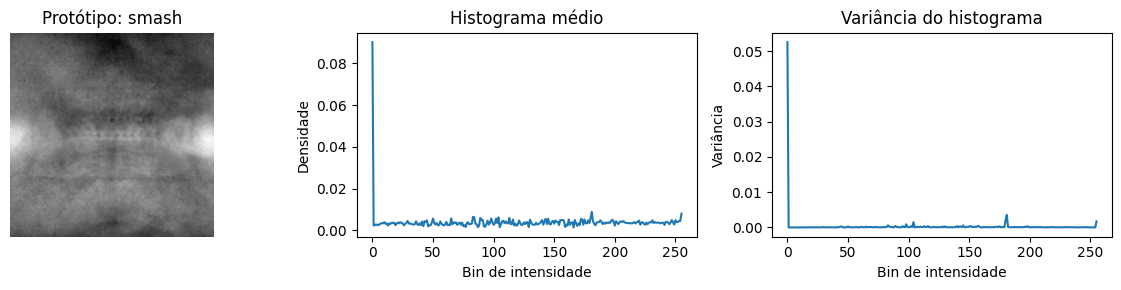

In [11]:
# === Célula 2: Cálculo de protótipos, hist. médio e hist. variância e plots ===
import numpy as np
import matplotlib.pyplot as plt

# Dicionários para armazenar
prototipos     = {}
hist_media     = {}
hist_variancia = {}

# Loop por classe normalizada
for classe in sorted(pasta_norm.iterdir()):
    if not classe.is_dir():
        continue
    imgs  = []
    hists = []
    
    # Carrega todas as imagens em escala de cinza
    for img_path in sorted(classe.iterdir()):
        if img_path.suffix.lower() not in (".png", ".jpg", ".jpeg"):
            continue
        img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
        imgs.append(img.astype(np.float32) / 255.0)
        # histograma de 256 bins normalizado
        h, _ = np.histogram(img.flatten(), bins=256, range=(0,255), density=True)
        hists.append(h)
    
    imgs  = np.stack(imgs, axis=0)   # shape (N, H, W)
    hists = np.stack(hists, axis=0)  # shape (N, 256)
    
    # Protótipo médio (imagem média)
    prototipos[classe.name] = np.mean(imgs, axis=0)
    # Estatísticas dos histogramas
    hist_media[classe.name]     = np.mean(hists, axis=0)
    hist_variancia[classe.name] = np.var(hists, axis=0)

    # Plots: protótipo, hist média e hist variância
    fig, axs = plt.subplots(1, 3, figsize=(12, 3))
    
    axs[0].imshow(prototipos[classe.name], cmap='gray')
    axs[0].axis('off')
    axs[0].set_title(f"Protótipo: {classe.name}")
    
    axs[1].plot(hist_media[classe.name])
    axs[1].set_title("Histograma médio")
    axs[1].set_xlabel("Bin de intensidade")
    axs[1].set_ylabel("Densidade")
    
    axs[2].plot(hist_variancia[classe.name])
    axs[2].set_title("Variância do histograma")
    axs[2].set_xlabel("Bin de intensidade")
    axs[2].set_ylabel("Variância")
    
    plt.tight_layout()
    plt.show()
